
## Autoregressive Model Analysis


For this assignment I will be doing autoregressive analysis on the <i>Appliances</i> column of the data set [
Appliances energy prediction](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# I used this function to format my date.
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
# Date parser for stored model results.
def modelDateparser(s):
    return datetime.strptime(s, '%Y-%m-%d %H:%M')

In [3]:
# Since I only need the date and appliance cols for this task, I only #selected these two.
col_list = ["date", "Appliances"]
rawDf = pd.read_csv('data/energydata_complete.csv',parse_dates=[0], squeeze=True, date_parser=parser,usecols=col_list)

### 1. Plotting Data

In [4]:
print('-'*60)
print('*** Head of the dataframe ***')
print('-'*60)
print(rawDf.head())
print('-'*60)
print('*** Tail of the dataframe ***')
print('-'*60)
print(rawDf.tail())

------------------------------------------------------------
*** Head of the dataframe ***
------------------------------------------------------------
                 date  Appliances
0 2016-01-11 17:00:00          60
1 2016-01-11 17:10:00          60
2 2016-01-11 17:20:00          50
3 2016-01-11 17:30:00          50
4 2016-01-11 17:40:00          60
------------------------------------------------------------
*** Tail of the dataframe ***
------------------------------------------------------------
                     date  Appliances
19730 2016-05-27 17:20:00         100
19731 2016-05-27 17:30:00          90
19732 2016-05-27 17:40:00         270
19733 2016-05-27 17:50:00         420
19734 2016-05-27 18:00:00         430


In [5]:
rawDf = rawDf.set_index('date')

<AxesSubplot:xlabel='date'>

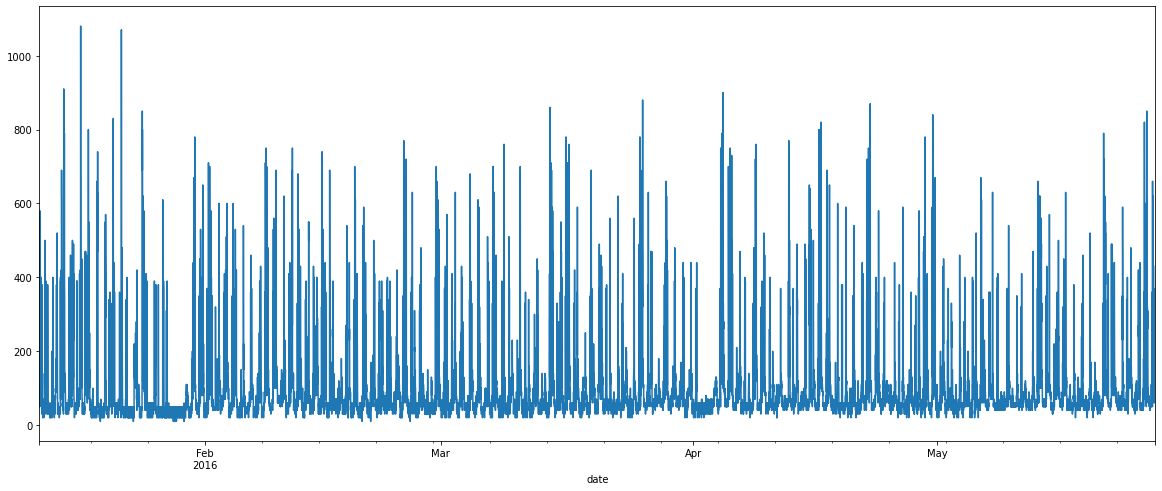

In [6]:
rawDf["Appliances"].plot(figsize=(20,8))

I am going to draw another plot of the same data over the sample of max temprature during the day because it is little difficult to notice much change in a dense representation of the data.

<AxesSubplot:xlabel='date'>

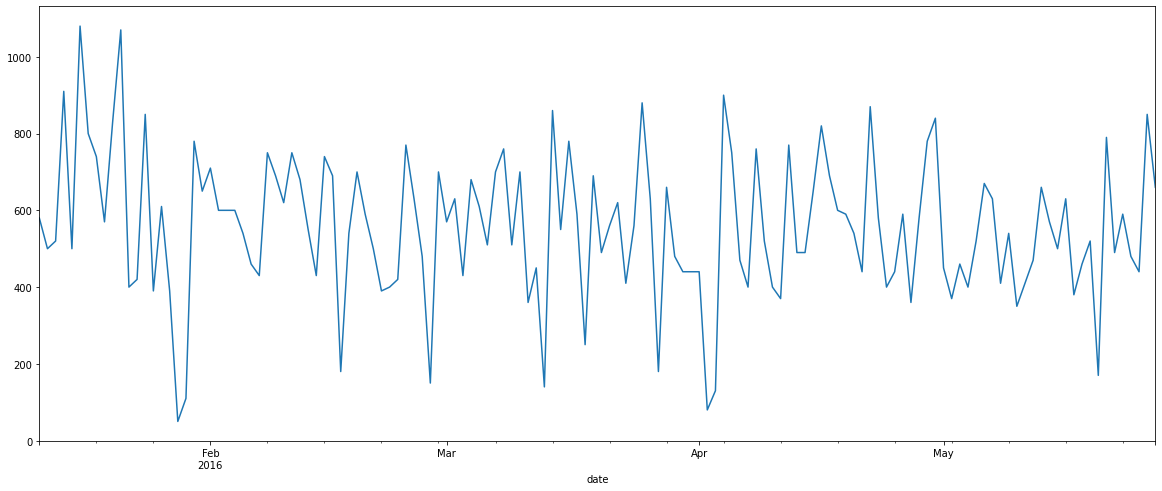

In [7]:
highs = rawDf["Appliances"].resample("D").max()
plt.figure(figsize=(20,8))
highs.plot()

From the graph we can see that the energy usage during winter(Specifically in January) is very high. This is directly related to the cold weather during this season. So, We can assume that there is some seasonality in our data and this violates the non-seasonality property of our timeseries data.

## 2. Preprocessing data

We can observe that our data goes up and down a lot and the first thing we do before feeding the data to our model is to <b>NORMALIZE</b> our data.


In [8]:
# because our data goes from 50 to 1000
avg, dev = rawDf.mean(), rawDf.std()
normalizedDf = (rawDf - avg) / dev

In [9]:
normalizedDf.head()

,Appliances
date,
2016-01-11 17:00:00,-0.367666
2016-01-11 17:10:00,-0.367666
2016-01-11 17:20:00,-0.465204
2016-01-11 17:30:00,-0.465204
2016-01-11 17:40:00,-0.367666


<AxesSubplot:xlabel='date'>

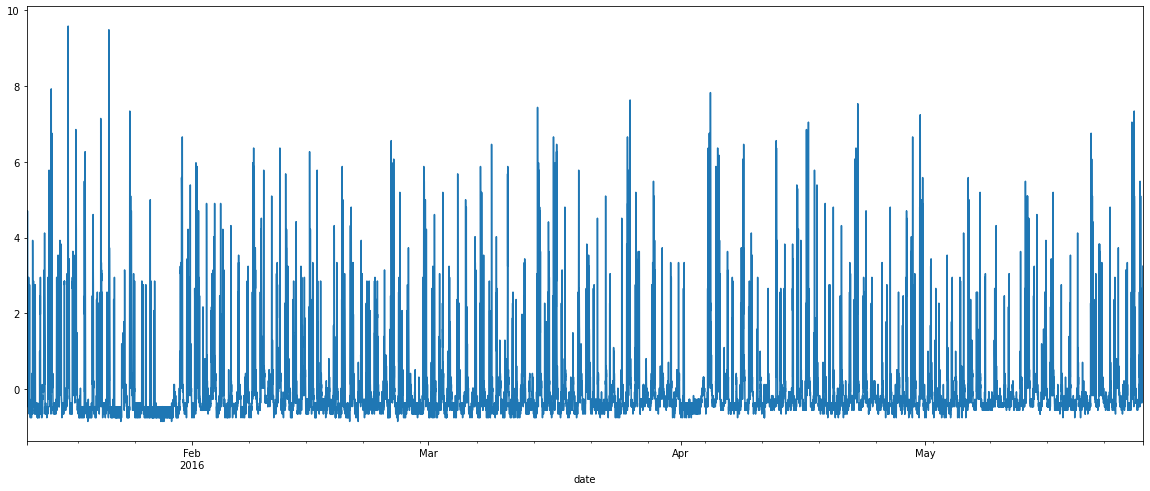

In [10]:
normalizedDf["Appliances"].plot(figsize=(20,8))

Normalizing the data wont change the graph of the data. The graph exactly looks similar to before only the range changes. Mean is centered around zero and sd = 1.

### 2. Splitting Time series

// Detail note will be added

In [11]:
trainArima = normalizedDf[0:11559] # The first three months
trainPhrophet = trainArima
testArima = normalizedDf[11560:]  
testPhrophet = testArima

### 3. Training my model

// Detail note will be added

In [11]:
autoModel =  auto_arima(trainArima,trace=True,max_P=30,max_D=5,max_q=5,seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=23516.948, Time=19.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=33740.821, Time=0.75 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23916.300, Time=1.65 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=26989.557, Time=2.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33739.365, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=23720.089, Time=5.32 sec
/opt/anaconda3/envs/nlpPisa2020/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=23804.982, Time=7.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=23515.113, Time=23.64 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=23516.041, Time=15.60 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=23519.898, Time=12.12 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=23511.650, Time=30.07 sec
 ARIM

Auto ARIMA gave us the best model to use for our data. <br>
Best model:  ARIMA(3,0,3)(0,0,0)

In [14]:
model = ARIMA(trainArima, order=(3,0,3))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Appliances   No. Observations:                11559
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -11746.973
Date:                Wed, 24 Mar 2021   AIC                          23509.946
Time:                        19:23:17   BIC                          23568.788
Sample:                    01-11-2016   HQIC                         23529.721
                         - 03-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.081      0.111      0.912      -0.150       0.168
ar.L1          0.4149      0.021     20.094      0.000       0.374       0.455
ar.L2          0.9519      0.016     59.762      0.000       0.921       0.983
ar.L3         -0.4169      0.017    -25.137      0.000      -0.449      -0.384
ma.L1          0.3805      0.020     18.784      0.000       0.341       0.420
ma.L2         -0.8094      0.016    -49.156      0.000      -0.842      -0.777
ma.L3         -0.2205      0.007    -30.074      0.000      -0.235      -0.206
sigma2         0.4469      0.003    173.777      0.000       0.442       0.452
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            211926.61
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             2.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting the future

In [15]:
history = [x for x in trainArima["Appliances"]]
predictions = list()

From the AutoARIMA I got the order of (3,0,0) to be the best estimation. I run the model over the data. I took me 12 hours to get the forecast result upto 28th of Apr 2016. I have also run the model with (3,0,0) and (5,0,0) orders. The result will be displayed below. I saved output to csv file and you can skip excuting the below code and see the result.

In [16]:
for t in range(len(testArima)):
    model = ARIMA(history, order=(3,0,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    obs = testArima["Appliances"][t]
    predictions.append(yhat)
    history.append(obs)
    print('exp=%f, pred=%f' % (obs, yhat))

exp=-0.465204, pred=-0.290579


KeyboardInterrupt: 

## 4. RESULT
### 4.1 Model 1 (3,0,3)
I will import the result of the model.

In [17]:
mod_col = ["date","Appliances","Forecast"]
model303 = pd.read_csv('data/modelPred303.csv',parse_dates=[0], squeeze=True,usecols=mod_col)

In [18]:
model303Data = model303.set_index("date")


<AxesSubplot:xlabel='date'>

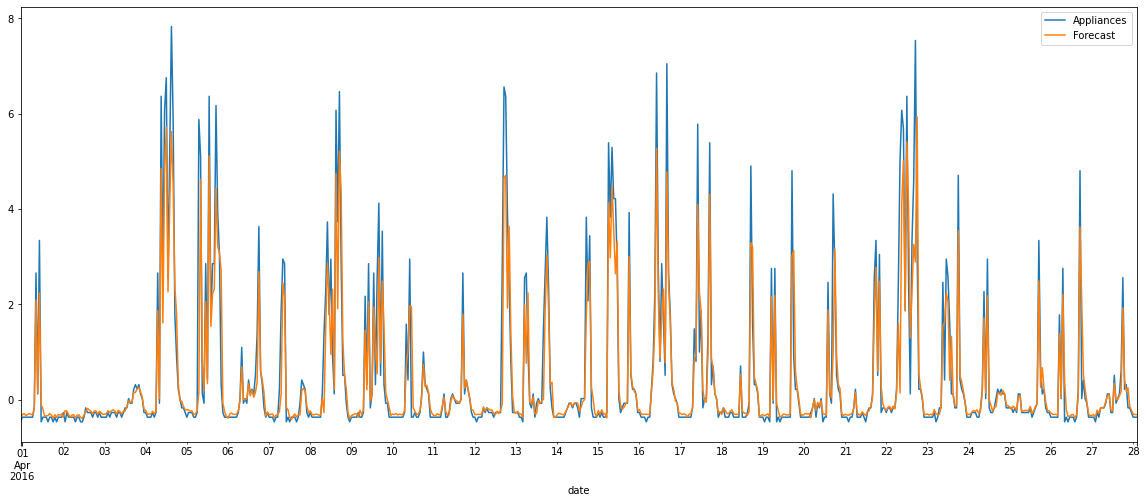

In [19]:
model303Data.resample("H").max().plot(figsize=(20,8))

## RMSE

In [29]:
from sklearn.metrics import mean_squared_error
import math

In [21]:
y_true = model303Data.reset_index()["Appliances"]
y_forecast = model303Data.reset_index()["Forecast"]

In [22]:
rmse303 = math.sqrt(mean_squared_error(y_true, y_forecast))

In [23]:
rmse303

0.6198170174854203

### 4.1 Model 1 (3,0,0)
I will import the result of the model.

In [24]:
mod_col = ["date","Appliances","Forecast"]
model300 = pd.read_csv('data/modelPred300.csv',parse_dates=[0], squeeze=True,usecols=mod_col)

In [25]:
model300Data = model300.set_index("date")

<AxesSubplot:xlabel='date'>

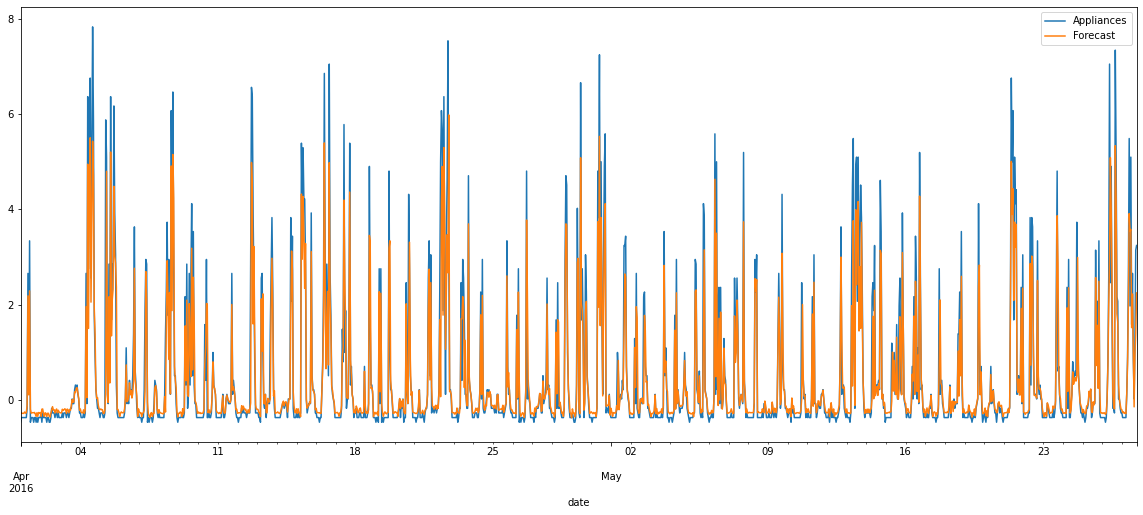

In [26]:
model300Data.resample("H").max().plot(figsize=(20,8))

### RMSE

In [27]:
y_true = model300Data.reset_index()["Appliances"]
y_forecast = model300Data.reset_index()["Forecast"]

In [28]:
rmse300 = math.sqrt(mean_squared_error(y_true, y_forecast))

In [29]:
rmse300

0.610734828770234

### 4.1 Model 1 (5,0,0)

In [22]:
mod_col = ["date","Appliances","Forecast"]
model500 = pd.read_csv('data/modelPred500.csv',parse_dates=[0], squeeze=True,usecols=mod_col)

In [24]:
model500Data = model500.set_index("date")

<AxesSubplot:xlabel='date'>

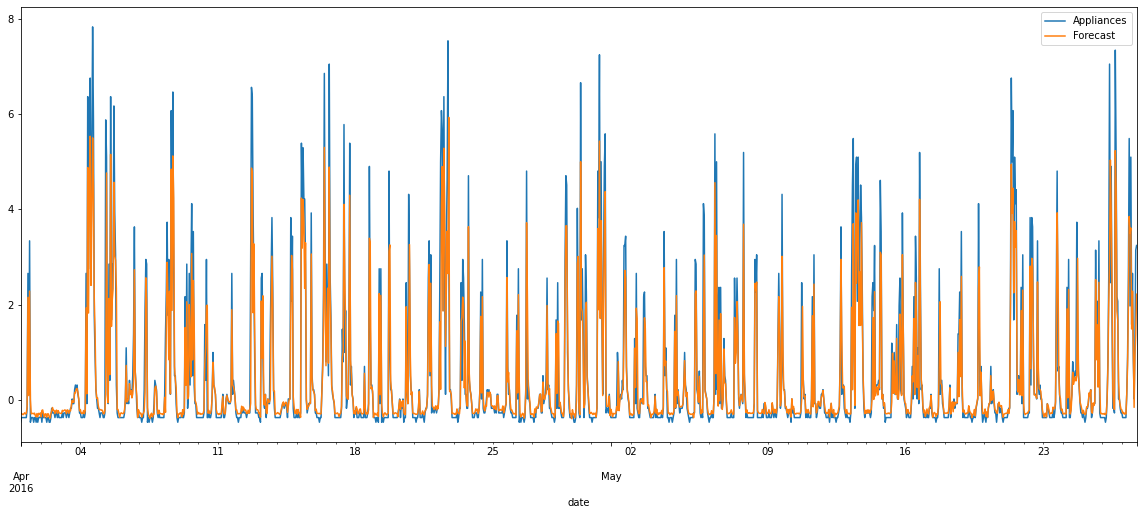

In [26]:
model500Data.resample("H").max().plot(figsize=(20,8))

### RMSE

In [27]:
y_true = model500Data.reset_index()["Appliances"]
y_forecast = model500Data.reset_index()["Forecast"]

In [30]:
rmse500 = math.sqrt(mean_squared_error(y_true, y_forecast))

In [31]:
rmse500

0.6088840736804269

So, this is better.

## Prophet Model

In [12]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [13]:
#trainPhrophet
#testPhrophet
trainPhrophet.head()

,Appliances
date,
2016-01-11 17:00:00,-0.367666
2016-01-11 17:10:00,-0.367666
2016-01-11 17:20:00,-0.465204
2016-01-11 17:30:00,-0.465204
2016-01-11 17:40:00,-0.367666


In [14]:
trainPhrophet = trainPhrophet.reset_index()
trainPhrophet.rename(columns={'date':'ds','Appliances':'y'},inplace=True)

In [15]:
trainPhrophet.head()

,ds,y
0,2016-01-11 17:00:00,-0.367666
1,2016-01-11 17:10:00,-0.367666
2,2016-01-11 17:20:00,-0.465204
3,2016-01-11 17:30:00,-0.465204
4,2016-01-11 17:40:00,-0.367666


## Training Prophet Model

In [17]:
phrophetModel = Prophet(daily_seasonality=True)
phrophetModel.fit(trainPhrophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


### Preparing future dates for prediction

In [18]:
testPhrophet = testPhrophet.reset_index()
future_dates = testPhrophet["date"].to_frame()
future_dates.rename(columns={'date':'ds'},inplace=True)

#### Forecasting using predict() method.

In [19]:
forecast = phrophetModel.predict(future_dates)
testPhrophet["Forecast"] = forecast["yhat"]

In [20]:
testPhrophet = testPhrophet.set_index("date")

<AxesSubplot:xlabel='date'>

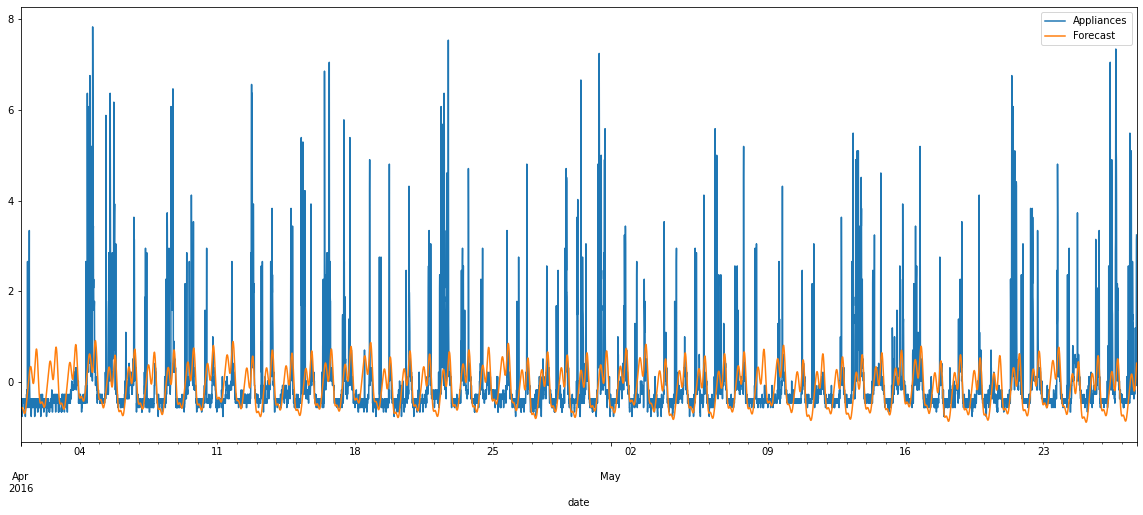

In [21]:
testPhrophet.plot(figsize=(20,8))

### RESOURCES
1. https://www.kaggle.com/manovirat/timeseries-using-prophet-hyperparameter-tuning